In [30]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

d1_trabalhadoC = pd.read_csv("d1_trabalhadoC.csv", sep=',')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d1_trabalhadoC)
d1_trabalhadoC = pd.DataFrame(scaler.transform(d1_trabalhadoC), columns = d1_trabalhadoC.columns)

In [32]:
target = 'G3_regular'
features = list(d1_trabalhadoC.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'G1_insuficiente', 'G1_regular', 'G1_excelente', 'G2_insuficiente', 'G2_regular', 'G2_excelente', 'G3_insuficiente', 'G3_excelente']
Target: G3_regular


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(d1_trabalhadoC[features], d1_trabalhadoC[target],
                                                    test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(316, 50)
(79, 50)
(316,)
(79,)


## KNN

In [34]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = clf.predict(X_val)

In [36]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print('Acurácia:', acc)

Acurácia: 0.7721518987341772


In [37]:
n_vizinhos = np.arange(1, 11) 

resultados = []

for k in n_vizinhos:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)

    resultados.append(acc)

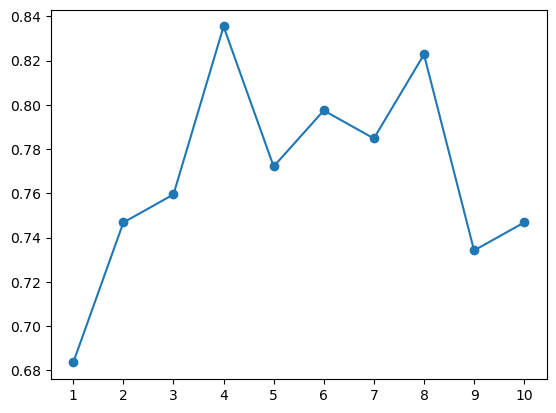

In [38]:
# No eixo x teremos o número de vizinhos e no eixo y a acurácia
plt.plot(n_vizinhos, resultados, '-o')
# Definindo que no eixo x queremos exibir cada numero de vizinhos
plt.xticks(n_vizinhos);